<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Домашнее задание 7: тесты о математически ожиданиях
</center>

**ФИО:**

## Общая информация

- [Лекция о точных тестах](https://youtu.be/PLrHmjw0EG0)
- [Лекция о тесте Уэлча](https://youtu.be/S52tY1h8nBE)
- Полезные блокноты: [тетрадка 1](https://github.com/FUlyankin/matstat-AB/blob/main/week09_hypo/10_13_python_mouse_and_man.ipynb) и [тетрадка 2](https://github.com/FUlyankin/matstat-AB/blob/main/week09_hypo/14_python_dependent.ipynb)

__Дата выдачи:__ 01.06.2024

__Дедлайн:__ 23:59MSK 20.06.2024

In [33]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

 ### Задача 1: экзамен

<center>
<img src="https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_2024/images/exam.jpeg?raw=true" width="400">
</center>
<br>


У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [34]:
df = pd.read_csv('students_exam.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


__а)__ __[4 балла]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college).

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

__Решение:__ Вначале определим какой статистический критерий нам подходит для сравнения средних. Напомним, что для z-критерия требуется выполнение следующих предпосылок:
- big data
- нет выбросов
- X1, X2, ..., Xn ~ iid(mu, sigma^2)

In [42]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [35]:
df['level_of_edu'] = np.where(df['parental level of education'].isin(['associate\'s degree', 'bachelor\'s degree', 'master\'s degree']), 'higher', 'middle')

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,level_of_edu
0,female,group B,bachelor's degree,standard,none,72,72,74,higher
1,female,group C,some college,standard,completed,69,90,88,middle
2,female,group B,master's degree,standard,none,90,95,93,higher
3,male,group A,associate's degree,free/reduced,none,47,57,44,higher
4,male,group C,some college,standard,none,76,78,75,middle


In [37]:
df.groupby('level_of_edu')['level_of_edu'].count()

,level_of_edu
level_of_edu,
higher,399
middle,601


По количеству наблюдений в двух группах (399 vs 601), данные не являются Big Data в полном смысле

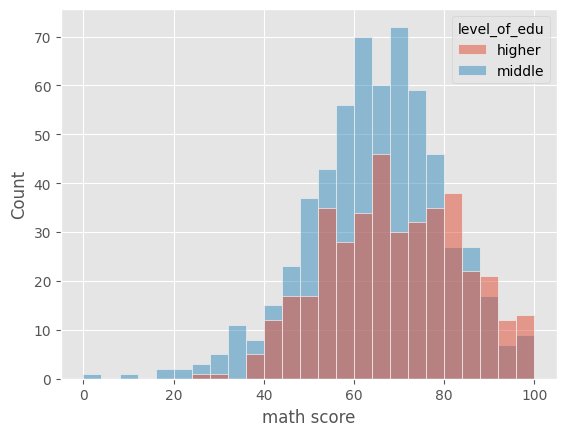

In [38]:
sns.histplot(df, x='math score', hue='level_of_edu')
plt.show()

Распределение показывает наличие выбросов (особенно в левой части диапазона). Однако в целом распределение похоже на нормальное (даже не смотря на наличие выбросов и небольших концентраций в 90+ баллах)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__  Поскольку:
- у нас не Big Data
- нам нужно сравнить разность средних в двух выборках
- дисперсия нам неизвестна (очевидно, поскольку это сложное явление, а не работающий станок со стандартным качеством)
будем использовать тест Уэлча.

Для его применения требуется выполнение двух предпосылок:
- любое n (не обязательно Big Data)
- X1, X2, ... , Xn - iid N(mu, sigma^2)

В нашем случае указанные предпосылки выполняются, распределения в целом похожи на нормальные.

В подсказках также говорится обратиить внимание на альтарнативную гипотезу - она у нас не о неравенстве. а строго что среднее в выборке с высшим образованием выше, чем со средним.

Также в подсказке спрашивается, как выборки могут быть связаны между собой. Чисто теоретически они могут быть связаны: например человек вначале получил среднее образование, сдал тесты, потом получил высшее и сдал еще раз. Однако идентифицировать таких людей невозможно:
- у нас нет уникального идентификатора признака
- набор признаков слишком узкий: отфильтровать по полу, расе и питанию таких нельзя, нужно больше признаковое пространство.

In [39]:
alpha = 0.05

x = df[df['level_of_edu'] == 'higher']['math score'].values
y = df[df['level_of_edu'] == 'middle']['math score'].values

x_mean, y_mean = x.mean(), y.mean()
x_mean, y_mean

(np.float64(68.60401002506266), np.float64(64.41930116472545))

In [40]:
x_var, y_var = x.var(ddof=1), y.var(ddof=1)
nx, ny = x.size, y.size

nu = (x_var / nx + y_var / ny)**2 / ((x_var**2 / (nx**2 * (nx - 1)) + y_var**2/(ny**2 * (ny-1))))

t_obs = (x_mean - y_mean) / np.sqrt(x_var / nx + y_var / ny)

In [41]:
t_crit = sts.t.ppf(1 - alpha, df=nu)

t_obs, t_crit

(np.float64(4.309042859193758), np.float64(1.6466457398775627))

__Вывод:__ Поскольку наблюдаемое значение критерия превышает критический уровень, нулевая гипотеза отвергается. Действительно, студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college).

__б)__ __[3 балла]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`?

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__в)__ __[3 балла]__ Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?

__Ответ:__ ....